PYGAME DAN KIVY

Dimas Ramadhan  | 180441100002
Dikky Jurais A   |  180441100135


Code Project Pygame
Main.py
import pygame
import sys
import traceback
from random import *
from pygame.locals import *
import bullet
import myplane
import enemy
import supply
import os


pygame.init()
pygame.mixer.init()
bg_size = width, height = 480, 720
screen = pygame.display.set_mode(bg_size)
pygame.display.set_caption("GAME PBO SI")
backgroud = pygame.image.load("image/background.png")


pygame.mixer.music.load("sound/game_music.mp3")
pygame.mixer.music.set_volume(0.2)
bullet_sound = pygame.mixer.Sound("sound/bullet.wav")
bullet_sound.set_volume(0.2)
big_enemy_flying_sound = pygame.mixer.Sound("sound/big_spaceship_flying.wav")
big_enemy_flying_sound.set_volume(0.2)
enemy1_down_sound = pygame.mixer.Sound("sound/enemy1_down.wav")
enemy1_down_sound.set_volume(0.2)
enemy2_down_sound = pygame.mixer.Sound("sound/enemy2_down.wav")
enemy2_down_sound.set_volume(0.2)
enemy3_down_sound = pygame.mixer.Sound("sound/enemy3_down.wav")
enemy3_down_sound.set_volume(0.2)
me_down_sound = pygame.mixer.Sound("sound/game_over.wav")
me_down_sound.set_volume(0.2)
button_down_sound = pygame.mixer.Sound("sound/button.wav")
button_down_sound.set_volume(0.2)
level_up_sound = pygame.mixer.Sound("sound/achievement.wav")
level_up_sound.set_volume(0.2)
bomb_sound = pygame.mixer.Sound("sound/use_bomb.wav")
bomb_sound.set_volume(0.2)
get_bomb_sound = pygame.mixer.Sound("sound/get_bomb.wav")
get_bomb_sound.set_volume(0.2)
get_bullet_sound = pygame.mixer.Sound("sound/get_double_laser.wav")
get_bullet_sound.set_volume(0.2)



def add_small_enemies(group1, group2, num):
    for i in range(num):
        e1 = enemy.SmallEnemy(bg_size)
        group1.add(e1)
        group2.add(e1)


def add_mid_enemies(group1, group2, num):
    for i in range(num):
        e2 = enemy.MidEnemy(bg_size)
        group1.add(e2)
        group2.add(e2)


def add_big_enemies(group1, group2, num):
    for i in range(num):
        e3 = enemy.BigEnemy(bg_size)
        group1.add(e3)
        group2.add(e3)



def inc_speed(target, inc):
    for each in target:
        each.speed += inc


def main():
    clock = pygame.time.Clock()
    switch_image = False
    delay = 60
    pygame.mixer.music.play(-1)
    running = True
    me = myplane.MyPlane(bg_size)
    score = 0
    score_font = pygame.font.SysFont("arial", 48)

    color_black = (0, 0, 0)
    color_green = (0, 255, 0)
    color_red = (255, 0, 0)
    color_white = (255, 255, 255)

    bomb_image = pygame.image.load("image/bomb.png")
    bomb_rect = bomb_image.get_rect()
    bomb_font = score_font
    bomb_num = 3

    level = 1
    paused = False
    pause_nor_image = pygame.image.load("image/game_pause_nor.png")
    pause_pressed_image = pygame.image.load("image/game_pause_pressed.png")
    resume_nor_image = pygame.image.load("image/game_resume_nor.png")
    resume_pressed_image = pygame.image.load("image/game_resume_pressed.png")
    paused_rect = pause_nor_image.get_rect()
    paused_rect.left, paused_rect.top = width - paused_rect.width - 10, 10
    paused_image = pause_nor_image

    gameover_image = pygame.image.load("image/game_over.png")
    gameover_rect = gameover_image.get_rect()
    flag_recorded = False

    life_image = pygame.image.load("image/life.png").convert()
    life_rect = life_image.get_rect()
    life_num = 3
    invincible_time = USEREVENT + 2

    bullet1 = []
    bullet1_index = 0
    bullet1_num = 6
    for i in range(bullet1_num):
        bullet1.append(bullet.Bullet1(me.rect.midtop))

    double_bullet_timer = USEREVENT + 1
    is_double_bullet = False
    bullet2 = []
    bullet2_index = 0
    bullet2_num = 10
    for i in range(bullet2_num // 2):
        bullet2.append(bullet.Bullet2((me.rect.centerx - 33, me.rect.centery)))
        bullet2.append(bullet.Bullet2((me.rect.centerx + 30, me.rect.centery)))

    enemies = pygame.sprite.Group()
    small_enemies = pygame.sprite.Group()
    add_small_enemies(small_enemies, enemies, 1)
    mid_enemies = pygame.sprite.Group()
    add_mid_enemies(mid_enemies, enemies, 1)
    big_enemies = pygame.sprite.Group()
    add_big_enemies(big_enemies, enemies, 1)

    bullet_supply = supply.BulletSupply(bg_size)
    bomb_supply = supply.BombSupply(bg_size)
    supply_timer = USEREVENT
    pygame.time.set_timer(supply_timer, 10 * 1000)

    e1_destroy_index = 0
    e2_destroy_index = 0
    e3_destroy_index = 0
    me_destroy_index = 0


    while running:
        screen.blit(backgroud, (0, 0))
        score_text = score_font.render("Score: %s" % str(score), True, color_white)
        screen.blit(score_text, (10, 5))

        if level == 1 and score > 5000:
            level = 2
            level_up_sound.play()
            add_small_enemies(small_enemies, enemies, 3)
            add_mid_enemies(mid_enemies, enemies, 2)
            add_big_enemies(big_enemies, enemies, 1)
            inc_speed(small_enemies, 1)
        elif level == 2 and score > 30000:
            level = 3
            level_up_sound.play()
            add_small_enemies(small_enemies, enemies, 3)
            add_mid_enemies(mid_enemies, enemies, 2)
            add_big_enemies(big_enemies, enemies, 1)
            inc_speed(small_enemies, 1)
            inc_speed(mid_enemies, 1)
        elif level == 3 and score > 60000:
            level = 4
            level_up_sound.play()
            add_small_enemies(small_enemies, enemies, 3)
            add_mid_enemies(mid_enemies, enemies, 2)
            add_big_enemies(big_enemies, enemies, 1)
            inc_speed(small_enemies, 1)
            inc_speed(mid_enemies, 1)
            inc_speed(big_enemies, 1)


        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                sys.exit()
            elif event.type == KEYDOWN:
                if event.key == K_SPACE:
                    if bomb_num:
                        bomb_num -= 1
                        bomb_sound.play()
                        for each in enemies:
                            if each.rect.bottom > 0:
                                each.active = False
            elif event.type == supply_timer:
                if choice([True, False]):
                    bomb_supply.reset()
                else:
                    bullet_supply.reset()
            elif event.type == double_bullet_timer:
                is_double_bullet = False
                pygame.time.set_timer(double_bullet_timer, 0)
            elif event.type == invincible_time:
                me.invincible = False
                pygame.time.set_timer(invincible_time, 0)
            elif event.type == MOUSEMOTION:
                if paused_rect.collidepoint(event.pos):
                    if paused:
                        paused_image = resume_pressed_image
                    else:
                        paused_image = pause_pressed_image
                else:
                    if paused:
                        paused_image = resume_nor_image
                    else:
                        paused_image = pause_nor_image
            elif event.type == MOUSEBUTTONDOWN:
                button_down_sound.play()
                if event.button == 1 and paused_rect.collidepoint(event.pos):
                    paused = not paused
                    if paused:
                        paused_image = resume_pressed_image
                        pygame.time.set_timer(supply_timer, 0)
                        pygame.mixer.music.pause()
                        pygame.mixer.pause()
                    else:
                        paused_image = pause_pressed_image
                        pygame.time.set_timer(supply_timer, 30 * 1000)
                        pygame.mixer.music.unpause()
                        pygame.mixer.unpause()
        screen.blit(paused_image, paused_rect)

        if life_num and (not paused):

            bomb_text = bomb_font.render("x %d" % bomb_num, True, color_black)
            bomb_text_rect = bomb_text.get_rect()
            screen.blit(bomb_image, (10, height - 10 - bomb_rect.height))
            screen.blit(bomb_text, (20 + bomb_rect.width, height - 10 - bomb_text_rect.height))

            for i in range(life_num):
                screen.blit(life_image, (width - 10 - (i + 1) * life_rect.width, height - 10 - life_rect.height))

            key_pressed = pygame.key.get_pressed()
            if key_pressed[K_w] or key_pressed[K_UP]:
                me.move_up()
            if key_pressed[K_s] or key_pressed[K_DOWN]:
                me.move_down()
            if key_pressed[K_a] or key_pressed[K_LEFT]:
                me.move_left()
            if key_pressed[K_d] or key_pressed[K_RIGHT]:
                me.move_right()

            if not (delay % 10):
                bullet_sound.play()
                if not is_double_bullet:
                    bullets = bullet1
                    bullets[bullet1_index].reset(me.rect.midtop)
                    bullet1_index = (bullet1_index + 1) % bullet1_num
                else:
                    bullets = bullet2
                    bullets[bullet2_index].reset((me.rect.centerx - 33, me.rect.centery))
                    bullets[bullet2_index + 1].reset((me.rect.centerx + 30, me.rect.centery))
                    bullet2_index = (bullet2_index + 2) % bullet2_num

            if bomb_supply.active:
                bomb_supply.move()
                screen.blit(bomb_supply.image, bomb_supply.rect)
                if pygame.sprite.collide_mask(bomb_supply, me):
                    get_bomb_sound.play()
                    if bomb_num < 3:
                        bomb_num += 1
                    bomb_supply.active = False
            if bullet_supply.active:
                bullet_supply.move()
                screen.blit(bullet_supply.image, bullet_supply.rect)
                if pygame.sprite.collide_mask(bullet_supply, me):
                    get_bullet_sound.play()
                    is_double_bullet = True
                    pygame.time.set_timer(double_bullet_timer, 18 * 1000)
                    bullet_supply.active = False

            for b in bullets:
                if b.active:
                    b.move()
                    screen.blit(b.image, b.rect)
                    enemies_hit = pygame.sprite.spritecollide(b, enemies, False, pygame.sprite.collide_mask)
                    if enemies_hit:
                        b.active = False
                        for e in enemies_hit:
                            if e in big_enemies or e in mid_enemies:
                                e.energy -= 1
                                e.hit = True
                                if e.energy == 0:
                                    e.active = False
                            else:
                                e.active = False

            enemies_down = pygame.sprite.spritecollide(me, enemies, False, pygame.sprite.collide_mask)
            if enemies_down and not me.invincible:
                me.active = False
                for e in enemies_down:
                    e.active = False


            if delay == 0:
                delay = 60
            delay -= 1
            if not delay % 3:
                switch_image = not switch_image
            if me.active:
                if switch_image:
                    screen.blit(me.image1, me.rect)
                else:
                    screen.blit(me.image2, me.rect)
            else:
                if not (delay % 3):
                    screen.blit(me.destroy_images[me_destroy_index], me.rect)
                    me_destroy_index = (me_destroy_index + 1) % 4
                    if me_destroy_index == 0:
                        me_down_sound.play()
                        life_num -= 1
                        me.reset()
                        pygame.time.set_timer(invincible_time, 3 * 1000)

            for each in big_enemies:
                if each.active:
                    each.move()
                    if not each.hit:
                        if switch_image:
                            screen.blit(each.image1, each.rect)
                        else:
                            screen.blit(each.image2, each.rect)
                    else:
                        screen.blit(each.image_hit, each.rect)
                        each.hit = False

                    pygame.draw.line(screen, color_black, (each.rect.left, each.rect.top - 5),
                                     (each.rect.right, each.rect.top - 5), 2)
                    energy_remain = each.energy / enemy.BigEnemy.energy
                    if energy_remain > 0.2:
                        energy_color = color_green
                    else:
                        energy_color = color_red
                    pygame.draw.line(screen, energy_color, (each.rect.left, each.rect.top - 5),
                                     (each.rect.left + each.rect.width * energy_remain, each.rect.top - 5), 2)
                    if each.rect.bottom == -50:
                        big_enemy_flying_sound.play(-1)
                else:
                    big_enemy_flying_sound.stop()
                    if e3_destroy_index == 0:
                        enemy3_down_sound.play()
                    if not (delay % 3):
                        screen.blit(each.destroy_images[e3_destroy_index], each.rect)
                        e3_destroy_index = (e3_destroy_index + 1) % 6
                        if e3_destroy_index == 0:
                            score += 6000
                            each.reset()

            for each in mid_enemies:
                if each.active:
                    each.move()
                    if not each.hit:
                        screen.blit(each.image, each.rect)
                    else:
                        screen.blit(each.image_hit, each.rect)
                        each.hit = False

                    pygame.draw.line(screen, color_black,
                                     (each.rect.left, each.rect.top - 5),
                                     (each.rect.right, each.rect.top - 5),
                                     2)
                    energy_remain = each.energy / enemy.MidEnemy.energy
                    if energy_remain > 0.2:
                        energy_color = color_green
                    else:
                        energy_color = color_red
                    pygame.draw.line(screen, energy_color,
                                     (each.rect.left, each.rect.top - 5),
                                     (each.rect.left + each.rect.width * energy_remain, each.rect.top - 5),
                                     2)
                else:
                    if e2_destroy_index == 0:
                        enemy2_down_sound.play()
                    if not (delay % 3):
                        screen.blit(each.destroy_images[e2_destroy_index], each.rect)
                        e2_destroy_index = (e2_destroy_index + 1) % 4
                        if e2_destroy_index == 0:
                            score += 2000
                            each.reset()

            for each in small_enemies:
                if each.active:
                    each.move()
                    screen.blit(each.image, each.rect)
                else:
                    if e1_destroy_index == 0:
                        enemy1_down_sound.play()
                    if not (delay % 3):
                        screen.blit(each.destroy_images[e1_destroy_index], each.rect)
                        e1_destroy_index = (e1_destroy_index + 1) % 4
                        if e1_destroy_index == 0:
                            score += 500
                            each.reset()

        elif life_num == 0:
            screen.blit(gameover_image, gameover_rect)
            pygame.mixer.music.stop()
            pygame.mixer.stop()
            pygame.time.set_timer(supply_timer, 0)

            if not flag_recorded:
                flag_recorded = True
                if not os.path.exists("score_record.txt"):
                    with open("score_record.txt", "w") as f:
                        f.write('0')
                with open("score_record.txt", "r") as f:
                    record_score = int(f.read())
                if score > record_score:
                    with open("score_record.txt", "w") as f:
                        f.write(str(score))
                f.close()

            record_score_text = score_font.render("%d" % record_score, True, color_black)
            screen.blit(record_score_text, (50, 25))
            game_over_score_text = score_font.render("%d" % score, True, color_black)
            screen.blit(game_over_score_text, (300, 25))

        pygame.display.flip()
        clock.tick(60)



if __name__ == '__main__':
    try:
        main()
    except SystemExit:
        pass
    except:
        traceback.print_exc()
        pygame.quit()
        input()

bullet.py
import pygame


class Bullet1(pygame.sprite.Sprite):
    def __init__(self, position):
        pygame.sprite.Sprite.__init__(self)
        self.image = pygame.image.load("image/bullet1.png")
        self.rect = self.image.get_rect()
        self.rect.left, self.rect.top = position
        self.speed = 12
        self.active = True
        self.mask = pygame.mask.from_surface(self.image)

    def move(self):
        if self.rect.top < 0:
            self.active = False
        else:
            self.rect.top -= self.speed

    def reset(self, position):
        self.rect.left, self.rect.top = position
        self.active = True


class Bullet2(pygame.sprite.Sprite):
    def __init__(self, position):
        pygame.sprite.Sprite.__init__(self)
        self.image = pygame.image.load("image/bullet2.png")
        self.rect = self.image.get_rect()
        self.rect.left, self.rect.top = position
        self.speed = 14
        self.active = True
        self.mask = pygame.mask.from_surface(self.image)

    def move(self):
        if self.rect.top < 0:
            self.active = False
        else:
            self.rect.top -= self.speed

    def reset(self, position):
        self.rect.left, self.rect.top = position
        self.active = True


enemy.py
import pygame
from random import *
class SmallEnemy(pygame.sprite.Sprite):
    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)
        self.image = pygame.image.load("image/enemy1.png")
        self.mask = pygame.mask.from_surface(self.image)
        self.destroy_images = []
        self.destroy_images.extend([pygame.image.load("image/enemy1_down1.png"),
                                    pygame.image.load("image/enemy1_down2.png"),
                                    pygame.image.load("image/enemy1_down3.png"),
                                    pygame.image.load("image/enemy1_down4.png")])
        self.rect = self.image.get_rect()
        self.width, self.height = bg_size[0], bg_size[1]
        self.speed = 2
        self.rect.left, self.rect.top = (randint(0, self.width - self.rect.width),
                                         randint(-5 * self.rect.height, -5)
                                         )
        self.active = True

    def move(self):
        if self.rect.top < self.height:
            self.rect.top += self.speed
        else:
            self.reset()

    def reset(self):
        self.rect.left, self.rect.top = (randint(0, self.width - self.rect.width),
                                         randint(-5 * self.rect.height, 0)
                                         )
        self.active = True


class MidEnemy(pygame.sprite.Sprite):
    energy = 5

    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)
        self.image = pygame.image.load("image/enemy2.png")
        self.mask = pygame.mask.from_surface(self.image)
        self.destroy_images = []
        self.destroy_images.extend([pygame.image.load("image/enemy2_down1.png"),
                                    pygame.image.load("image/enemy2_down2.png"),
                                    pygame.image.load("image/enemy2_down3.png"),
                                    pygame.image.load("image/enemy2_down4.png")])
        self.image_hit = pygame.image.load("image/enemy2_hit.png")
        self.rect = self.image.get_rect()
        self.width, self.height = bg_size[0], bg_size[1]
        self.speed = 1
        self.rect.left, self.rect.top = (randint(0, self.width - self.rect.width),
                                         randint(-10 * self.rect.height, -self.rect.height)
                                         )
        self.active = True
        self.energy = MidEnemy.energy
        self.hit = False

    def move(self):
        if self.rect.top < self.height:
            self.rect.top += self.speed
        else:
            self.reset()

    def reset(self):
        self.rect.left, self.rect.top = (randint(0, self.width - self.rect.width),
                                         randint(-10 * self.rect.height, -self.rect.height)
                                         )
        self.active = True
        self.energy = MidEnemy.energy
        self.hit = False


class BigEnemy(pygame.sprite.Sprite):
    energy = 15

    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)
        self.image1 = pygame.image.load("image/enemy3_n1.png")
        self.image2 = pygame.image.load("image/enemy3_n2.png")
        self.mask = pygame.mask.from_surface(self.image1)
        self.destroy_images = []
        self.destroy_images.extend([pygame.image.load("image/enemy3_down1.png"),
                                    pygame.image.load("image/enemy3_down2.png"),
                                    pygame.image.load("image/enemy3_down3.png"),
                                    pygame.image.load("image/enemy3_down4.png"),
                                    pygame.image.load("image/enemy3_down5.png"),
                                    pygame.image.load("image/enemy3_down6.png")])
        self.image_hit = pygame.image.load("image/enemy3_hit.png")
        self.rect = self.image1.get_rect()
        self.width, self.height = bg_size[0], bg_size[1]
        self.speed = 2
        self.rect.left, self.rect.top = (randint(0, self.width - self.rect.width),
                                         randint(-15 * self.rect.height, -5 * self.rect.height)
                                         )
        self.active = True
        self.energy = BigEnemy.energy
        self.hit = False

    def move(self):
        if self.rect.top < self.height:
            self.rect.top += self.speed
        else:
            self.reset()

    def reset(self):
        self.rect.left, self.rect.top = (randint(0, self.width - self.rect.width),
                                         randint(-15 * self.rect.height, -5 * self.rect.height)
                                         )
        self.active = True
        self.energy = BigEnemy.energy
        self.hit = False


myplane.py
import pygame


class MyPlane(pygame.sprite.Sprite):
    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)

        self.image1 = pygame.image.load("image/hero1.png")
        self.image2 = pygame.image.load("image/hero2.png")
        self.mask = pygame.mask.from_surface(self.image1)
        self.destroy_images = []
        self.destroy_images.extend([pygame.image.load("image/hero_blowup_n1.png"),
                                    pygame.image.load("image/hero_blowup_n2.png"),
                                    pygame.image.load("image/hero_blowup_n3.png"),
                                    pygame.image.load("image/hero_blowup_n4.png")])
        self.rect = self.image1.get_rect()
        self.width, self.height = bg_size[0], bg_size[1]
        self.rect.left, self.rect.top = (self.width - self.rect.width) // 2, (
            self.height - self.rect.height - 60)
        self.speed = 10
        self.active = True
        self.invincible = False


    def move_up(self):
        if self.rect.top > 0:
            self.rect.top -= self.speed
        else:
            self.rect.top = 0

    def move_down(self):
        if self.rect.bottom < self.height - 60:
            self.rect.top += self.speed
        else:
            self.rect.bottom = self.height - 60

    def move_left(self):
        if self.rect.left > 0:
            self.rect.left -= self.speed
        else:
            self.rect.left = 0

    def move_right(self):
        if self.rect.right < self.width:
            self.rect.right += self.speed
        else:
            self.rect.right = self.width

    def reset(self):
        self.rect.left, self.rect.top = (self.width - self.rect.width) // 2, (self.height - self.rect.height - 60)
        self.active = True
        self.invincible = True


supply.py
import pygame
from random import *
class BombSupply(pygame.sprite.Sprite):
    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)

        self.image = pygame.image.load("image/ufo2.png")
        self.rect = self.image.get_rect()
        self.width, self.height = bg_size[0], bg_size[1]
        self.rect.left, self.rect.bottom = randint(0, self.width - self.rect.width), -100
        self.speed = 5
        self.active = False
        self.mask = pygame.mask.from_surface(self.image)

    def move(self):
        if self.rect.top < self.height:
            self.rect.top += self.speed
        else:
            self.active = False

    def reset(self):
        self.active = True
        self.rect.left, self.rect.bottom = randint(0, self.width - self.rect.width), -100



class BulletSupply(pygame.sprite.Sprite):
    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)

        self.image = pygame.image.load("image/ufo1.png")
        self.rect = self.image.get_rect()
        self.width, self.height = bg_size[0], bg_size[1]
        self.rect.left, self.rect.bottom = randint(0, self.width - self.rect.width), -100
        self.speed = 5
        self.active = False
        self.mask = pygame.mask.from_surface(self.image)

    def move(self):
        if self.rect.top < self.height:
            self.rect.top += self.speed
        else:
            self.active = False

    def reset(self):
        self.active = True
        self.rect.left, self.rect.bottom = randint(0, self.width - self.rect.width), -100



Code Project Kivy

Main.py
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.screenmanager import ScreenManager, Screen
from kivy.properties import ObjectProperty
from kivy.uix.popup import Popup
from kivy.uix.label import Label
from database import DataBase


class CreateAccountWindow(Screen):
    namee = ObjectProperty(None)
    email = ObjectProperty(None)
    password = ObjectProperty(None)

    def submit(self):
        if self.namee.text != "" and self.email.text != "" and self.email.text.count("@") == 1 and self.email.text.count(".") > 0:
            if self.password != "":
                db.add_user(self.email.text, self.password.text, self.namee.text)

                self.reset()

                sm.current = "login"
            else:
                invalidForm()
        else:
            invalidForm()

    def login(self):
        self.reset()
        sm.current = "login"

    def reset(self):
        self.email.text = ""
        self.password.text = ""
        self.namee.text = ""


class LoginWindow(Screen):
    email = ObjectProperty(None)
    password = ObjectProperty(None)

    def loginBtn(self):
        if db.validate(self.email.text, self.password.text):
            MainWindow.current = self.email.text
            self.reset()
            sm.current = "main"
        else:
            invalidLogin()

    def createBtn(self):
        self.reset()
        sm.current = "create"

    def reset(self):
        self.email.text = ""
        self.password.text = ""


class MainWindow(Screen):
    n = ObjectProperty(None)
    created = ObjectProperty(None)
    email = ObjectProperty(None)
    current = ""

    def logOut(self):
        sm.current = "login"

    def on_enter(self, *args):
        password, name, created = db.get_user(self.current)
        self.n.text = "Account Name: " + name
        self.email.text = "Email: " + self.current
        self.created.text = "Created On: " + created


class WindowManager(ScreenManager):
    pass


def invalidLogin():
    pop = Popup(title='Invalid Login',
                  content=Label(text='Invalid username or password.'),
                  size_hint=(None, None), size=(400, 400))
    pop.open()


def invalidForm():
    pop = Popup(title='Invalid Form',
                  content=Label(text='Please fill in all inputs with valid information.'),
                  size_hint=(None, None), size=(400, 400))

    pop.open()


kv = Builder.load_file("my.kv")

sm = WindowManager()
db = DataBase("users.txt")

screens = [LoginWindow(name="login"), CreateAccountWindow(name="create"),MainWindow(name="main")]
for screen in screens:
    sm.add_widget(screen)

sm.current = "login"


class MyMainApp(App):
    def build(self):
        return sm


if __name__ == "__main__":
    MyMainApp().run()

my.kv
<CreateAccountWindow>:
    name: "create"

    namee: namee
    email: email
    password: passw

    FloatLayout:
        cols:1

        FloatLayout:
            size: root.width, root.height/2

            Label:
                text: "BUAT AKUN UTM ANDA"
                size_hint: 0.8, 0.2
                pos_hint: {"x":0.1, "top":1}
                font_size: (root.width**2 + root.height**2) / 14**4

            Label:
                size_hint: 0.5,0.12
                pos_hint: {"x":0, "top":0.8}
                text: "Name: "
                font_size: (root.width**2 + root.height**2) / 14**4

            TextInput:
                pos_hint: {"x":0.5, "top":0.8}
                size_hint: 0.4, 0.12
                id: namee
                multiline: False
                font_size: (root.width**2 + root.height**2) / 14**4

            Label:
                size_hint: 0.5,0.12
                pos_hint: {"x":0, "top":0.8-0.13}
                text: "Email: "
                font_size: (root.width**2 + root.height**2) / 14**4

            TextInput:
                pos_hint: {"x":0.5, "top":0.8-0.13}
                size_hint: 0.4, 0.12
                id: email
                multiline: False
                font_size: (root.width**2 + root.height**2) / 14**4

            Label:
                size_hint: 0.5,0.12
                pos_hint: {"x":0, "top":0.8-0.13*2}
                text: "Password: "
                font_size: (root.width**2 + root.height**2) / 14**4

            TextInput:
                pos_hint: {"x":0.5, "top":0.8-0.13*2}
                size_hint: 0.4, 0.12
                id: passw
                multiline: False
                password: True
                font_size: (root.width**2 + root.height**2) / 14**4

        Button:
            pos_hint:{"x":0.3,"y":0.25}
            size_hint: 0.4, 0.1
            font_size: (root.width**2 + root.height**2) / 17**4
            text: "Sudah Punya Akun UTM? Masuk"
            on_release:
                root.manager.transition.direction = "left"
                root.login()

        Button:
            pos_hint:{"x":0.2,"y":0.05}
            size_hint: 0.6, 0.15
            text: "Selesai"
            font_size: (root.width**2 + root.height**2) / 14**4
            on_release:
                root.manager.transition.direction = "left"
                root.submit()


<LoginWindow>:
    name: "login"

    email: email
    password: password

    FloatLayout:

        Label:
            text:"Email: "
            font_size: (root.width**2 + root.height**2) / 13**4
            pos_hint: {"x":0.1, "top":0.9}
            size_hint: 0.35, 0.15

        TextInput:
            id: email
            font_size: (root.width**2 + root.height**2) / 13**4
            multiline: False
            pos_hint: {"x": 0.45 , "top":0.9}
            size_hint: 0.4, 0.15

        Label:
            text:"Password: "
            font_size: (root.width**2 + root.height**2) / 13**4
            pos_hint: {"x":0.1, "top":0.7}
            size_hint: 0.35, 0.15

        TextInput:
            id: password
            font_size: (root.width**2 + root.height**2) / 13**4
            multiline: False
            password: True
            pos_hint: {"x": 0.45, "top":0.7}
            size_hint: 0.4, 0.15

        Button:
            pos_hint:{"x":0.2,"y":0.05}
            size_hint: 0.6, 0.2
            font_size: (root.width**2 + root.height**2) / 13**4
            text: "Login"
            on_release:
                root.manager.transition.direction = "up"
                root.loginBtn()

        Button:
            pos_hint:{"x":0.3,"y":0.3}
            size_hint: 0.4, 0.1
            font_size: (root.width**2 + root.height**2) / 17**4
            text: "Belum Punya Akun UTM? Ayo Buat"
            on_release:
                root.manager.transition.direction = "right"
                root.createBtn()


<MainWindow>:
    n: n
    email: email
    created:created

    FloatLayout:
        Label:
            id: n
            pos_hint:{"x": 0.1, "top":0.9}
            size_hint:0.8, 0.2
            text: "Nama Akun: "

        Label:
            id: email
            pos_hint:{"x": 0.1, "top":0.7}
            size_hint:0.8, 0.2
            text: "Email: "

        Label:
            id: created
            pos_hint:{"x": 0.1, "top":0.5}
            size_hint:0.8, 0.2
            text: "Created: "

        Button:
            pos_hint:{"x":0.2, "y": 0.1}
            size_hint:0.6,0.2
            text: "Log Out"
            on_release:
                app.root.current = "login"
                root.manager.transition.direction = "down"

Database.py
import datetime


class DataBase:
    def __init__(self, filename):
        self.filename = filename
        self.users = None
        self.file = None
        self.load()

    def load(self):
        self.file = open(self.filename, "r")
        self.users = {}

        for line in self.file:
            email, password, name, created = line.strip().split(";")
            self.users[email] = (password, name, created)

        self.file.close()

    def get_user(self, email):
        if email in self.users:
            return self.users[email]
        else:
            return -1

    def add_user(self, email, password, name):
        if email.strip() not in self.users:
            self.users[email.strip()] = (password.strip(), name.strip(), DataBase.get_date())
            self.save()
            return 1
        else:
            print("Email exists already")
            return -1

    def validate(self, email, password):
        if self.get_user(email) != -1:
            return self.users[email][0] == password
        else:
            return False

    def save(self):
        with open(self.filename, "w") as f:
            for user in self.users:
                f.write(user + ";" + self.users[user][0] + ";" + self.users[user][1] + ";" + self.users[user][2] + "\n")

    @staticmethod
    def get_date():
        return str(datetime.datetime.now()).split(" ")[0]










HASIL Screen Shoot Program Pygame
File Folder Pygame Aircraft War


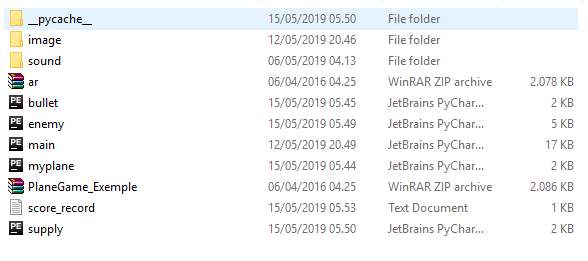
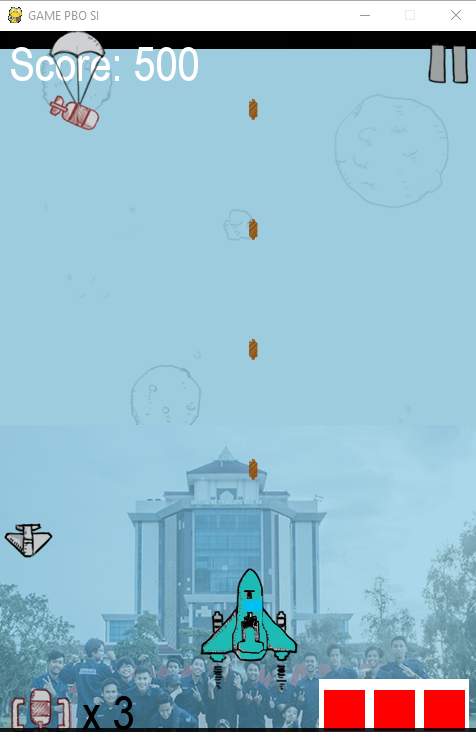
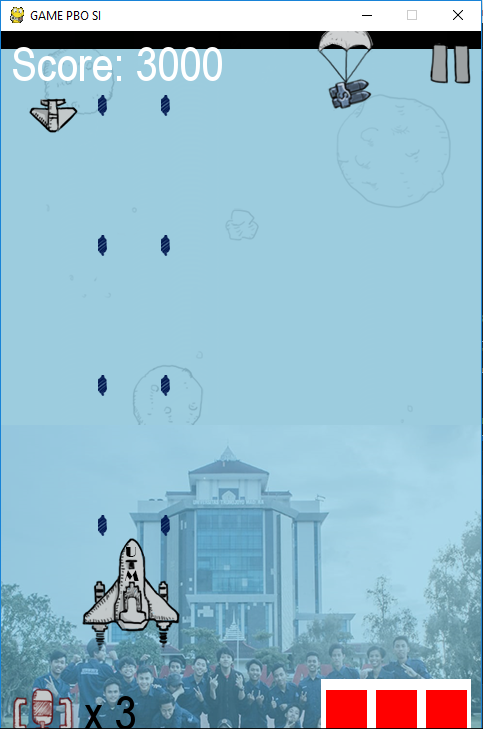
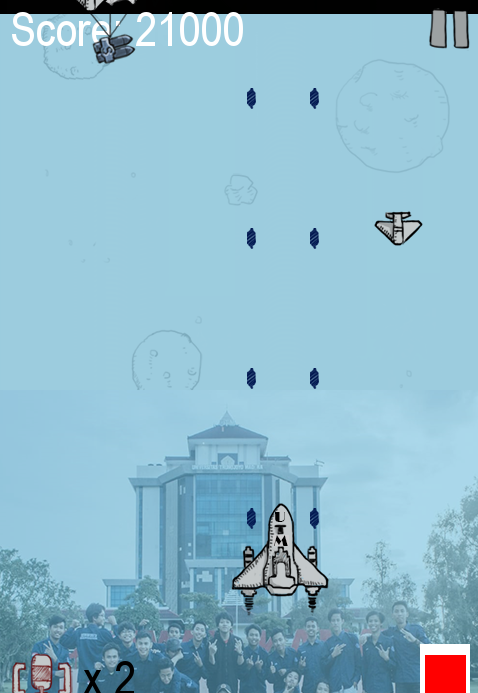
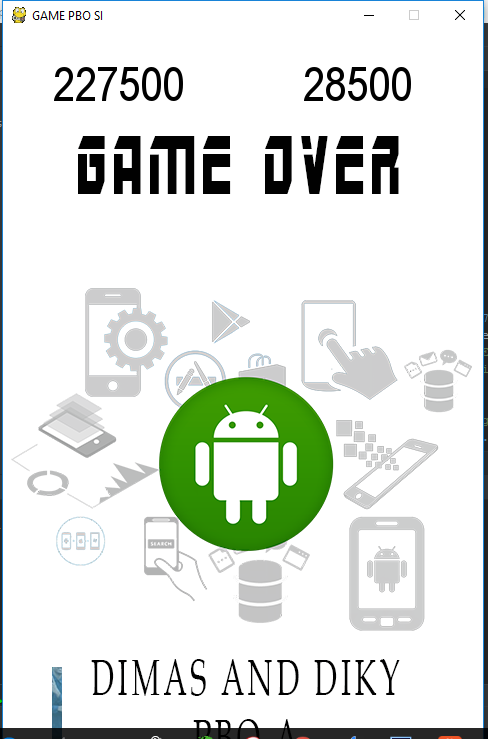



HASIL Screen Shoot Program Kivy
File Folder Kivy Form Login

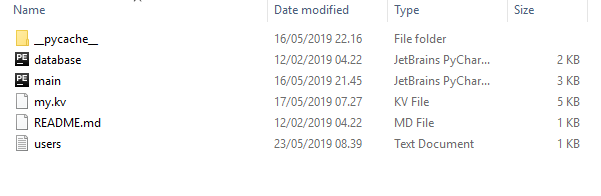
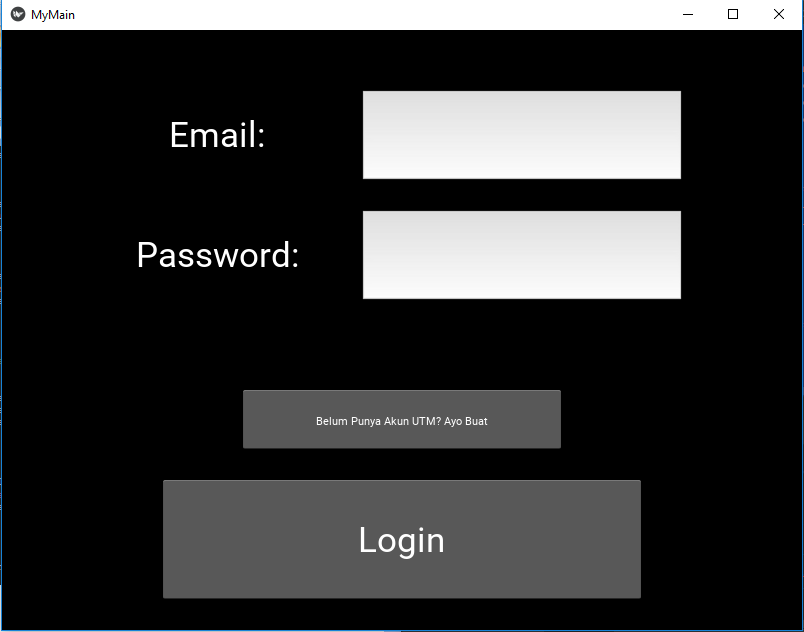
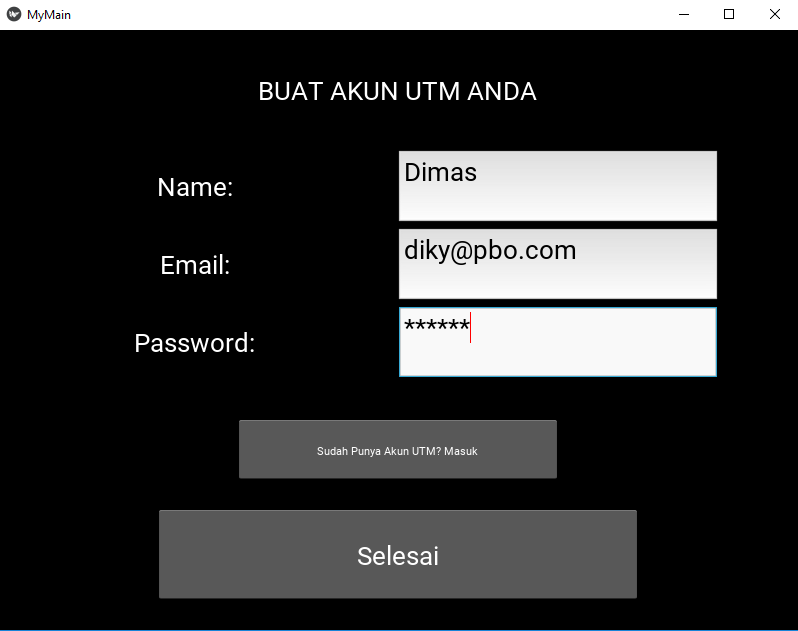
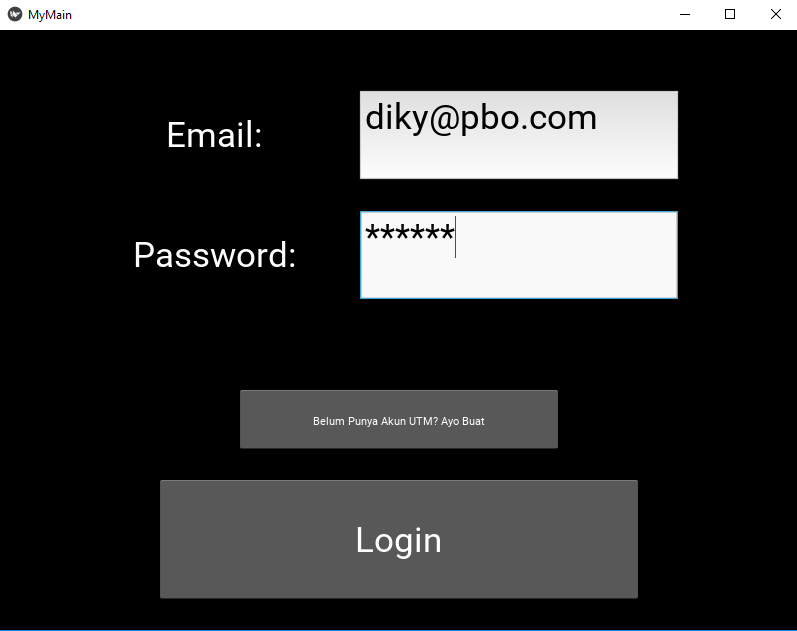
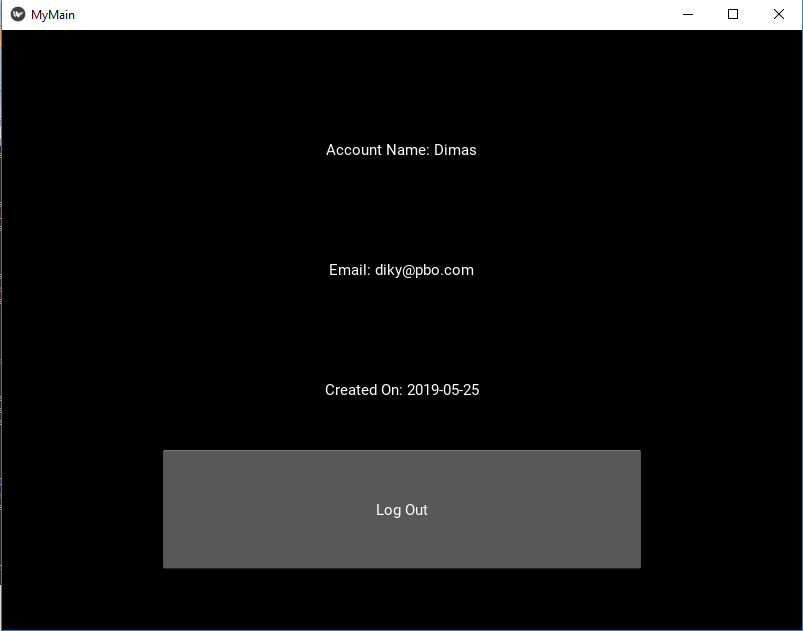
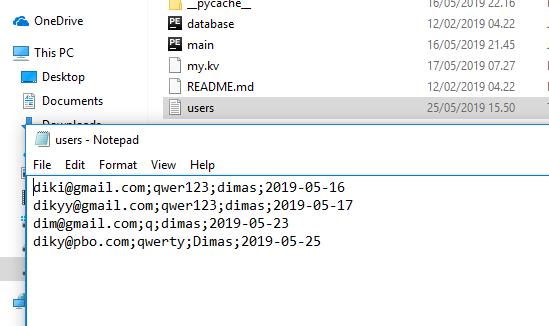




Pengertian Dan Cara Instalasi

PYGAME

Pengertian
Pygame adalah seperangkat modul Python yang dirancang untuk membuat permainan. Pygame menambahkan fungsi di atas dengan sangat baik di SDL perpustakaan. Hal ini memungkinkan Anda untuk membuat sebuah game dengan fitur yang lengkap dan sebuah program multimedia dalam bahasa python. Pygame sangat portabel dan dapat berjalan pada hampir semua platform dan sistem operasi. Pygame sendiri telah didownload  jutaan kali, dan telah memiliki jutaan kunjungan ke situsnya.
         	Pygame ini gratis. Dan dirilis di bawah Lisensi GPL , Anda dapat membuat sebuah aplikasi yang open source, gratis, freeware, shareware, dan game komersial dengan pygame ini.Untuk pengenalan yang bagus untuk pygame ini, periksa baris demi baris simpanse tutorial , dan pengenalan untuk programmer python atau Bab 17 sampai 20 dari buku "Ciptakan Anda Game Komputer Sendiri dengan Python" .

Cara instalasi
1.	Cek versi python kalian
kalian harus mengetahui terlebih dahulu versi python yang terinstall di PC kalian dulu ya….

2.	Medownload atau mengunduh file instalasi pygame.
Setelah itu kalian buka browser kalian dan pergi ke pygame.org/download.shtml . nah terus, klik link seperti Pada gambar bawah ini. Atau lebih mudahnya, kalian bisa klik link ini http://www.lfd.uci.edu~gohlke/pythonlibs/#pygame

3.	extract file hasil download.
Nah setelah itu, silahkan cari file instalasi pygame hasil download nya tadi ya… setelah itu, ubah extensi “.whl” menjadi “.zip”

4.	Paste file yang sudah di copy.
Nah setelah kalian salin file – file nya, Lalu selanjutnya silahkan kalian pergi ke drive “C”. lalu pilih folder python sesuai versi nya. Contoh “pythonXX” huruf XX ini menandakan versi python nya. Contoh “python34”. Silahkan masuk ke folder “pythonxx” nya.. lalu masuk ke folder “include”. Nah di folder ini silahkan buat folder baru dengan nama “pygame”. Lalu paste file yang sudah di copy tadi kedalam folder “pygame” 

5.	copy paste folder pygame.
Setelah itu selesai, silahkan copy folder “pygame” dan “pygame-1.9.2.data” hasil extract tadi ya. INGATT!!! Folder ”pygame” yang di copy adalah folder hasil extract nya ya.. bukan folder yang kita buat tadi.

6.	Finsih dan pengecekan.
Nah sekarang sudah selesai proses nya… namun, untuk memastikan pygame nya sudah terinstall atau belum, sekarang buka IDLE nya.. dan coba ketikkan “import pygame”















KIVY

Pengertian
Kivy merupakan library Python open source yang digunakan untuk mengembangkan aplikasi mobile dengan user inetrface alami (Natural User Interface). Kivy bisa berjalan pada platform Android, iOS, Linux, OS X dan Windows. Kivy berlisensi MIT. (Wikipedia).

Cara Instalasi 
1.	Pastikan Anda memiliki pip dan roda terbaru
	python -m pip install --upgrade pip wheel setuptools

2.	Instal dependensi (lewati gstreamer (~ 120MB) jika tidak diperlukan, lihat dependensi Kivy):
	python -m pip install docutils pygments pypiwin32 kivy.deps.sdl2 kivy.deps.glew
	python -m pip install kivy.deps.gstreamer

3.	Untuk Python 3.5+, Anda juga bisa menggunakan backend angle bukan glew. Ini dapat diinstal dengan:
	python -m pip install kivy.deps.angle
	python -m pip install kivy









	
Struktur Kelas Dan Penjelasan

Di sini Saya Menggunkaan Berbasis File (.py) jadi setuap Class atau Orientasi nya terpisah di setiap file dan . Kemudian Akan Di Gabungkan dengan Cara Di Import kan ke file Utama (Main.py)






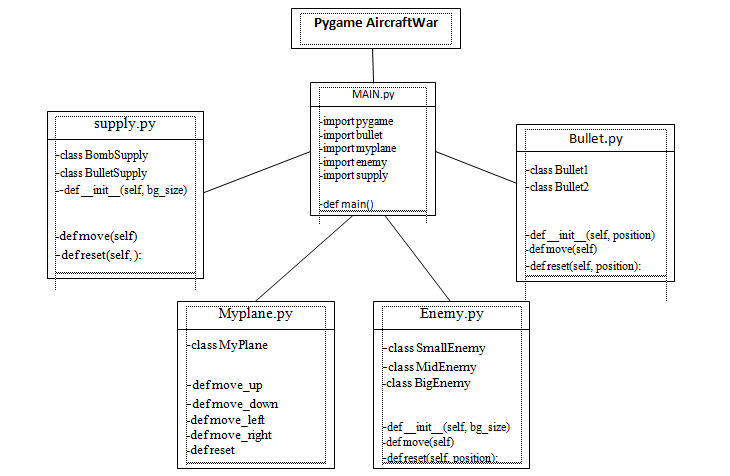


Global Variable:
import pygame  (memasukan Pygame)
import sys
import traceback
from random import *
from pygame.locals import *
import bullet  (Memasukan Class atau file Bullet / peluru)
import myplane  (Memasukan Class atau file plane /pesawat)
import enemy  (Memasukan Class atau file enemy /musuh)
import supply  (Memasukan Class atau file supply /logistik)
import os
Pygame.init()
bg_size  = width, height  (Ukuran gameplay)
screen = width, height  (Ukuran layar Screen pygame )
Method :
	Init
	Add
            sprite.Sprite
	image
	rect
	display.set
	surface.rect
            mask.from_surface
            images.extend


Main.py

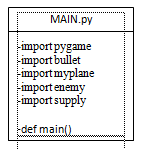

Berbasis File (.py) jadi setuap Class atau Orientasi nya terpisah di setiap file dan . Kemudian Akan Di Gabungkan dengan Cara Di Import kan ke file Utama (Main.py)

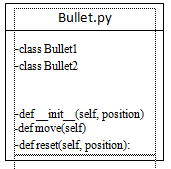

-	Class bullet 1 dan 2 (merukapan peluru awal dan peluru ke dua setelah mendapat suply)
-	def.move(self)  (untuk gerakan dari peluru tersebut speed dan arah nya)
-	def.reset (untuk mereset pergerakan peluru)


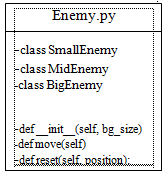

-	calss smallEnemy (adalah musuh kecil yang biasa 1 hit kalah)
-	calss midlEnemy (adalah musuh sedang yang  3 hit kalah)
-	calss biglEnemy (adalah musuh besar raja yang 6  hit kalah)
-	def.move(self)  (untuk gerakan dari lawan tersebut speed dan arah nya)
-	def.reset (untuk mereset pergerakan lawam)

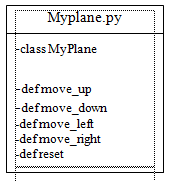

-	class Myplane (adalah class dari pesawat kita)
-	def.move(self/ all)  (untuk gerakan dari pesawat kita tersebut speed dan arah nya)
-	def.reset (untuk mereset pergerakan peawat kita)


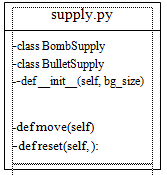

-	class boom suply (suplay boom atau senjata)
-	class bullet (adalah peluru 2 pada bullet)
-	def.move(self)  (untuk gerakan dari objek tersebut speed dan arah nya)
-	def.reset (untuk mereset pergerakan objek)



Kivy


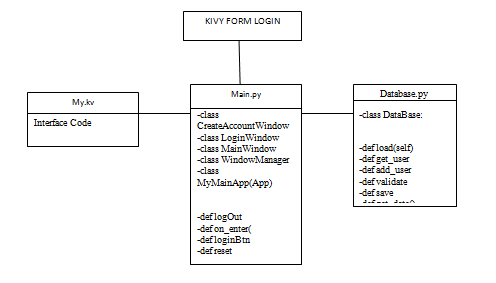

Hampir sama dengan pygame kivy ada file yang berbentuk (.kv) yang merukapan desain atau interface pada aplikasi yang ber dasar pada kode python

IMPLEMENTASI MATERI OOP

Property (atau disebut juga dengan atribut) adalah data yang terdapat dalam sebuah class. Melanjutkan analogi tentang laptop, property dari laptop bisa berupa merk, warna, jenis processor, ukuran layar, dan lain-lain.
class SmallEnemy(pygame.sprite.Sprite):
    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)
        self.image = pygame.image.load("image/enemy1.png")
        self.mask = pygame.mask.from_surface(self.image)
        self.destroy_images = []
        self.destroy_images.extend




Objek adalah hasil cetak dari class, atau hasil ‘konkrit’ dari class. Jika menggunakan analogi class laptop, maka objek dari class laptop bisa berupa: laptop_andi, laptop_anto, laptop_duniailkom, dan lain-lain. Objek dari class laptopakan memiliki seluruh ciri-ciri laptop, yaitu property dan method-nya.
pygame.display.flip()

Method adalah tindakan yang bisa dilakukan di dalam class. Jika menggunakan analogi class laptop kita, maka contoh method adalah: menghidupkan laptop, mematikan laptop, mengganti cover laptop, dan berbagai tindakan lain.
class BulletSupply(pygame.sprite.Sprite):
    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)

        self.image = pygame.image.load("image/ufo1.png")
        self.rect = self.image.get_rect()
        self.width, self.height = bg_size[0], bg_size[1]
        self.rect.left, self.rect.bottom = randint(0, self.width - self.rect.width), -100
        self.speed = 5
        self.active = False
        self.mask = pygame.mask.from_surface(self.image)

Class adalah ‘cetak biru’ atau ‘blueprint’ dari object. Class digunakan hanya untuk membuat kerangka dasar. Yang akan kita pakai nantinya adalah hasil cetakan dari class, yakni object.
import pygame


class MyPlane(pygame.sprite.Sprite):
    def __init__(self, bg_size):
        pygame.sprite.Sprite.__init__(self)

        self.image1 = pygame.image.load("image/hero1.png")
        self.image2 = pygame.image.load("image/hero2.png")
        self.mask = pygame.mask.from_surface(self.image1)



Inheritance (warisan atau turunan) adalah sebuah konsep yang penting di dalamPython. Inheritance adalah sebuah proses dimana sebuah class mengambil semua properti dan semua metode dari kelas lain.
class LoginWindow(Screen):
    email = ObjectProperty(None)
    password = ObjectProperty(None)

class WindowManager(ScreenManager):
    pass

Import file atau mengambil suatu data file .py yg berisi class dan object , sistem dan program yang di taruh ke suatu file lain
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.screenmanager import ScreenManager, Screen
from kivy.properties import ObjectProperty
from kivy.uix.popup import Popup
from kivy.uix.label import Label
from database import DataBase


